In [2]:
import os

test_images_file_paths = list(map(lambda x: 'test_images/Case_05_RLVD/' + x, os.listdir('test_images/Case_05_RLVD/')))

In [3]:
len(test_images_file_paths)

600

/home/daniil/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:2941: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


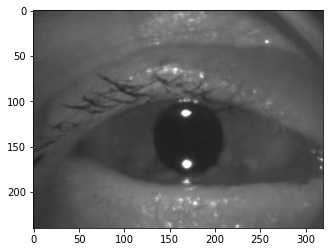

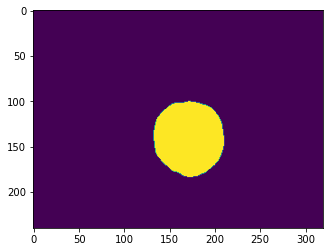

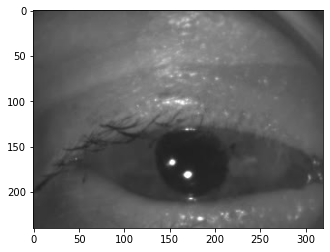

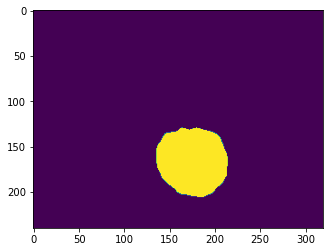

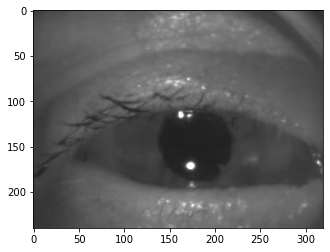

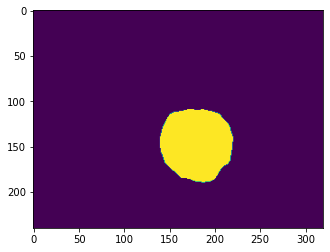

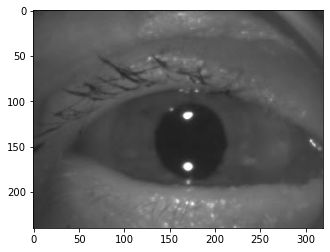

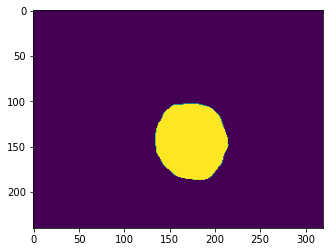

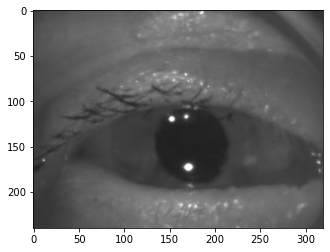

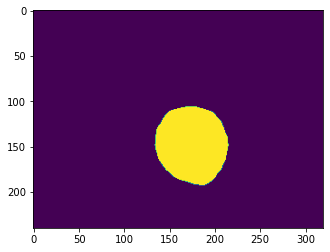

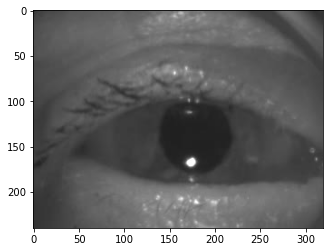

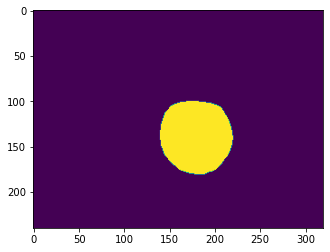

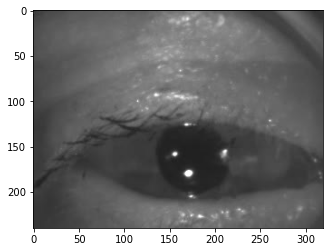

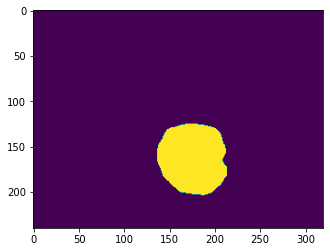

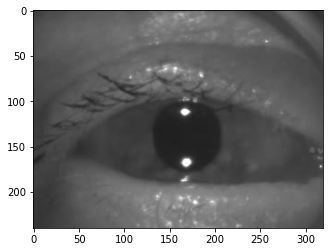

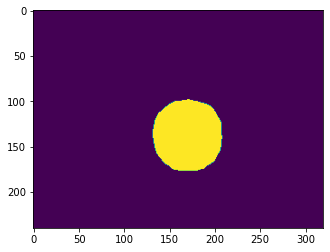

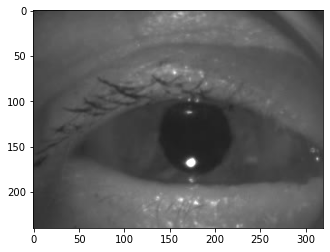

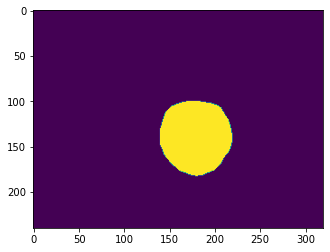

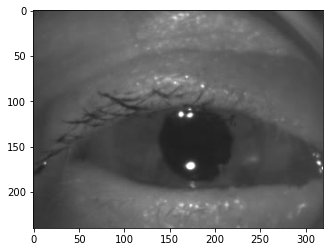

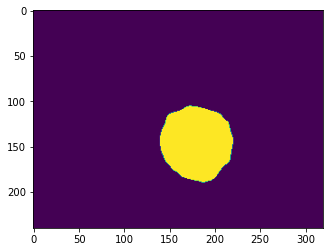

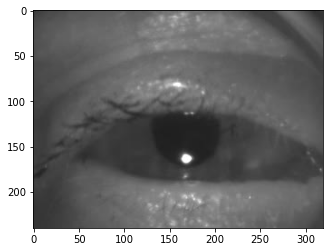

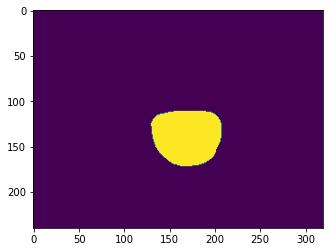

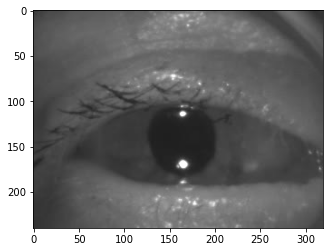

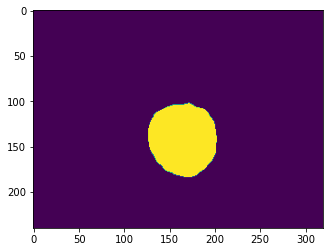

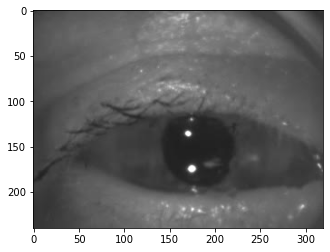

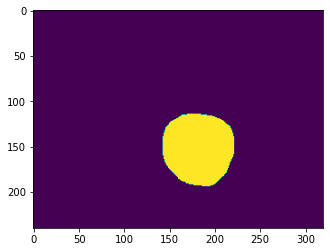

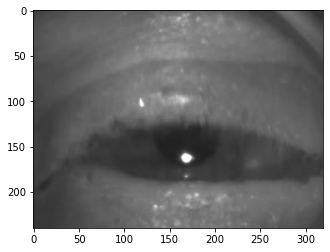

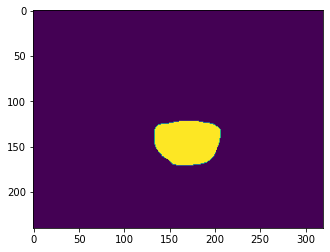

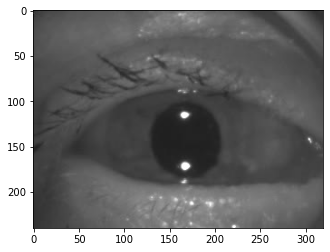

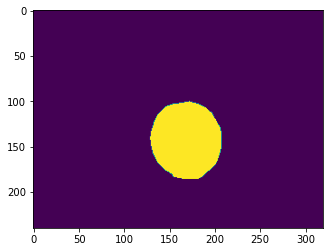

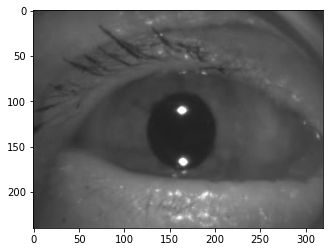

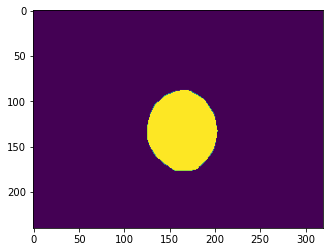

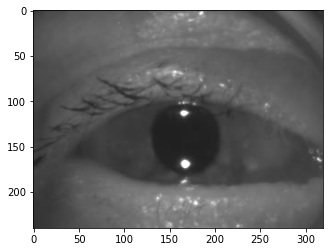

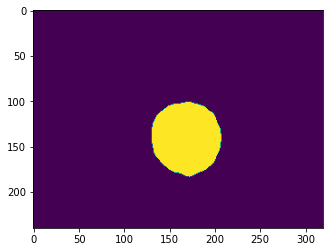

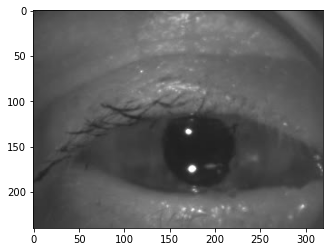

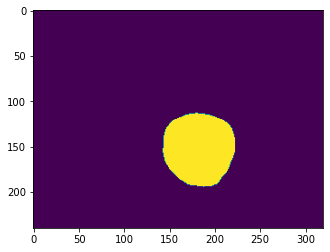

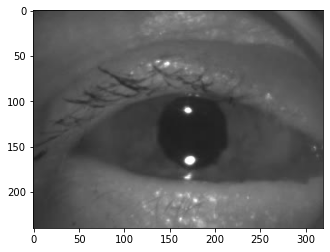

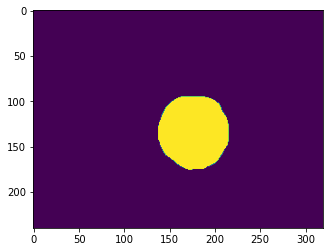

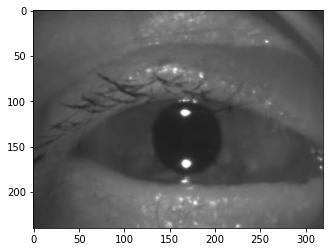

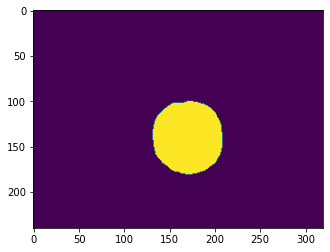

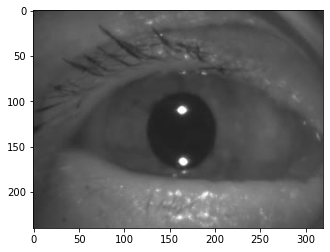

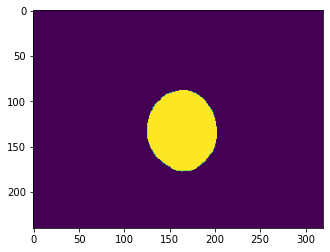

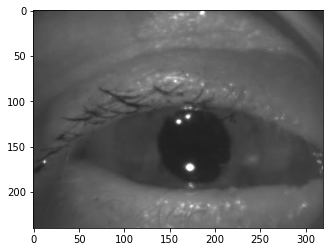

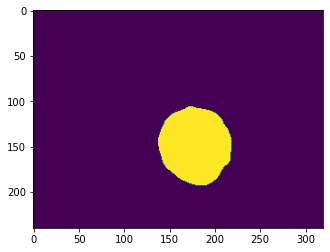

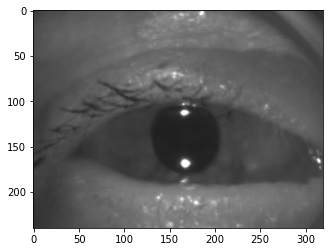

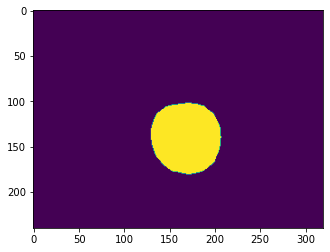

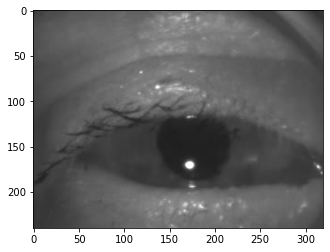

KeyboardInterrupt: 

In [4]:
%matplotlib inline

import sys, os
sys.path.insert(0, 'pytorch-segmentation-detection/vision/')
sys.path.append('pytorch-segmentation-detection/')

# Use second GPU -pytorch-segmentation-detection- change if you want to use a first one
os.environ["CUDA_VISIBLE_DEVICES"] = '1'


from PIL import Image
from matplotlib import pyplot as plt

import torch
from torchvision import transforms
from torch.autograd import Variable
import pytorch_segmentation_detection.models.resnet_dilated as resnet_dilated

import numpy as np

from pytorch_segmentation_detection.datasets.openeds import OpenEDS

# trainset = OpenEDS(dataset_base_folder_path='',
#                    csv_folds_file='split.csv',
#                    train=False,
#                    fold_number=0,
#                    joint_transform=None,
#                    test=True)

#img_path = trainset.df.loc[14990, 'Id']

img_path = '/home/daniil/repos/pink/dataset/test/images/51.png'

#img_path = 'siebel_pic_daniil_01.png'

#img_path = '/home/daniil/projects/endovis/dataset/instrument_dataset_2/left_frames/frame003.png'

valid_transform = transforms.Compose(
                [
                    #transforms.CenterCrop((1024, 1280)),
                     #transforms.Resize((512, 512), Image.BILINEAR),
                     transforms.ToTensor(),
                     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                ])

fcn = resnet_dilated.Resnet18_8s(num_classes=19)
fcn.load_state_dict(torch.load('resnet_18_8s_pink_eyes.pth'))
fcn.cuda()
fcn.eval()


with torch.no_grad():
    
    for img_path in test_images_file_paths:

        img_not_preprocessed = Image.open(img_path).convert('RGB')#.resize((512, 512))

        img = valid_transform(img_not_preprocessed)

        img = img.unsqueeze(0)

        img = Variable(img.cuda())

        res = fcn(img)

        _, tmp = res.squeeze(0).max(0)

        segmentation = tmp.data.cpu().numpy().squeeze()

        plt.imshow(img_not_preprocessed)
        plt.show()

        plt.imshow(segmentation)
        plt.show()

        segmentation[segmentation == 0] = 10
        segmentation[segmentation == 1] = 0
        segmentation[segmentation == 10] = 1

        plt.imshow(segmentation[:, :, None] * np.asarray(img_not_preprocessed))

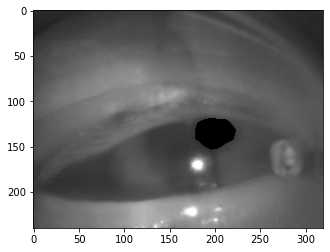

In [25]:
segmentation[segmentation == 0] = 10
segmentation[segmentation == 1] = 0
segmentation[segmentation == 10] = 1

plt.imshow(segmentation[:, :, None] * np.asarray(img_not_preprocessed))